# Fake news Detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
# Importing spacy
import spacy


#importing models
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks as cf
#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Machine Learning libraries
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 
#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score

#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Deep learning libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


## Exploratory Data Analysis

### Inserting fake and real dataset

In [ ]:
df_fake = pd.read_csv("datasets/Fake.csv")
df_true = pd.read_csv("datasets/True.csv")

In [ ]:
df_fake.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_fake.info()
print('\n')
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
df_fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [ ]:
df_true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [ ]:
display(df_fake.subject.value_counts())

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [ ]:
display(df_true.subject.value_counts())

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

Inserting a column called "class" for fake and real news dataset to categories fake and true news. 

In [ ]:
df_fake["class"] = 0
df_true["class"] = 1

Removing last 10 rows from both the dataset, for manual testing  

In [ ]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [ ]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [ ]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

Merging the manual testing dataframe in single dataset and save it in a csv file

In [ ]:
# df_fake_manual_testing["class"] = 0
# df_true_manual_testing["class"] = 1

In [ ]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23461,REPORT: ‘Federal Government Escalated the Viol...,KILLED: Rancher and protest spokesman Robert ...,Middle-east,"January 28, 2016",0
23462,"BOILER ROOM – Oregon Standoff, Cuddle Parties,...",Tune in to the Alternate Current Radio Network...,Middle-east,"January 28, 2016",0
23463,"Eyewitness Says Feds Ambushed Bundys, 100 Shot...",Patrick Henningsen 21st Century Wire UPDATE: 1...,Middle-east,"January 27, 2016",0
23464,Episode #119 – SUNDAY WIRE: ‘You Know the Dril...,Episode #119 of SUNDAY WIRE SHOW finally resum...,Middle-east,"January 24, 2016",0
23465,‘There’ll be boots on the ground’: US making n...,21st Century Wire says Various parties in Wash...,Middle-east,"January 23, 2016",0
23466,Boston Brakes? How to Hack a New Car With Your...,21st Century Wire says For those who still ref...,Middle-east,"January 22, 2016",0
23467,Oregon Governor Says Feds ‘Must Act’ Against P...,"21st Century Wire says So far, after nearly 20...",Middle-east,"January 21, 2016",0
23468,Ron Paul on Burns Oregon Standoff and Jury Nul...,21st Century Wire says If you ve been followin...,Middle-east,"January 21, 2016",0
23469,BOILER ROOM: As the Frogs Slowly Boil – EP #40,Tune in to the Alternate Current Radio Network...,Middle-east,"January 20, 2016",0
23470,Arizona Rancher Protesting in Oregon is Target...,RTOne of the most visible members of the armed...,Middle-east,"January 20, 2016",0


In [ ]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
df_manual_testing = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("datasets/manual_testing.csv")

Merging the main fake and true dataframe

In [ ]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
df_merge.tail(10)

,title,text,subject,date,class
21397,Germany's Schulz says he would demand U.S. wit...,BERLIN (Reuters) - The leader of Germany s Soc...,worldnews,"August 23, 2017",1
21398,Blunt instrument? What a list of banned articl...,SHANGHAI (Reuters) - An old review of an acade...,worldnews,"August 23, 2017",1
21399,Saudi police release teenager detained for dan...,DUBAI (Reuters) - A 14-year-old boy who was de...,worldnews,"August 22, 2017",1
21400,"The People's Princess, Britons work to keep me...",LONDON (Reuters) - Abdul Daoud spilt most of t...,worldnews,"August 23, 2017",1
21401,"Argentina labor unions protest job losses, Mac...",BUENOS AIRES (Reuters) - Argentina s main labo...,worldnews,"August 22, 2017",1
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1


In [ ]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44878 entries, 0 to 21406
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44878 non-null  object
 1   text     44878 non-null  object
 2   subject  44878 non-null  object
 3   date     44878 non-null  object
 4   class    44878 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [ ]:
df_merge.describe()

,class
count,44878.000000
mean,0.477004
std,0.499476
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df_merge.nunique()

title      38721
text       38637
subject        8
date        2397
class          2
dtype: int64

In [ ]:
df_merge.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [ ]:
## Correlation Matrix
corr = df_merge.corr()
corr.style.background_gradient(cmap='coolwarm')
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2)

,class
class,1.00


#### "title",  "subject" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.

In [ ]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [ ]:
df.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [ ]:
df.tail(10)

,text,class
21397,BERLIN (Reuters) - The leader of Germany s Soc...,1
21398,SHANGHAI (Reuters) - An old review of an acade...,1
21399,DUBAI (Reuters) - A 14-year-old boy who was de...,1
21400,LONDON (Reuters) - Abdul Daoud spilt most of t...,1
21401,BUENOS AIRES (Reuters) - Argentina s main labo...,1
21402,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,1
21403,WASHINGTON (Reuters) - The United States sugge...,1
21404,WASHINGTON (Reuters) - The United States has d...,1
21405,ISLAMABAD (Reuters) - Outlining a new strategy...,1
21406,GENEVA (Reuters) - North Korea and the United ...,1


#### Randomly shuffling the dataframe 

In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.head(10)

,text,class
21474,Hillary shows her true colors when a female st...,0
6101,Maybe being a racist bigot isn t good for busi...,0
11017,Lou Hobbs praised President Donald Trump for h...,0
21242,KAMPALA (Reuters) - South Sudanese soldiers ar...,1
18232,NJ Governor Chris Christie was being heckled d...,0
1321,WASHINGTON (Reuters) - President Donald Trump ...,1
12143,UNITED NATIONS (Reuters) - U.S. Secretary of S...,1
19235,"ERBIL, Iraq (Reuters) - A delegation from the ...",1
20989,"As an American of Polish descent, I am proud t...",0
365,"Saturday, September 16th, 2017 will surely go ...",0


In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['text', 'class'], dtype='object')

In [ ]:
df.tail(10)

,text,class
44868,WASHINGTON (Reuters) - President Donald Trump ...,1
44869,(Reuters) - More than 9.2 million U.S. consume...,1
44870,Fox News host Bill O Reilly and Fox Business h...,0
44871,GENEVA (Reuters) - People travelling to the Ol...,1
44872,WASHINGTON (Reuters) - President Donald Trump ...,1
44873,"CALGARY, Alberta (Reuters) - The Conservative ...",1
44874,MOSCOW (Reuters) - The approval by the United ...,1
44875,A man disguised himself in a burka in order to...,0
44876,"KARANGASEM, Indonesia (Reuters) - Some tourist...",1
44877,GENEVA (Reuters) - Government forces have used...,1


###Data cleaning

#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [ ]:
def drop_symbols(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
df["text"] = df["text"].apply(drop_symbols)

In [ ]:
n2=df

In [ ]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}


In [ ]:

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [ ]:
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)


In [ ]:
n2['text']=n2['text'].apply(lambda xl:expand_contractions(xl))

In [ ]:
n2['text']=n2['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

###Lemmatization

In [ ]:
# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [ ]:
dfeh=df.head(100)

In [ ]:
dfeh['cleaned']=dfe['text'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
# Lemmatization with stopwords removal
dfeh['lemmatized']=dfeh['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [ ]:
dfeh_grouped=dfeh[['author','lemmatized']].groupby(by='author').agg(lambda x:' '.join(x))
dfeh_grouped.head()

In [ ]:
# Creating Document Term Matrix

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(dfeh_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=dfeh_grouped.index
df_dtm.head(3)

###Wordcloud

In [ ]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

###Polarity

In [ ]:
# Transposing document term matrix
df_dtm=df_dtm.transpose()

In [ ]:
# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

In [ ]:

product_polarity_sorted=pd.DataFrame(dfeh.groupby('author')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(100,100))
plt.xlabel('Polarity')
plt.ylabel('Author')
plt.title('Polarity')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='green',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=38,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=38,color='black')
  
plt.yticks([])
plt.show()

#### Defining dependent and independent variable as x and y

In [ ]:
x = df["text"]
y = df["class"]

#### Splitting the dataset into training set and testing set. 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

#### Convert text to vectors

In [ ]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Applying Models

### 1. Passive Aggressive Classifier

In [ ]:
# Initialize a PassiveAggressiveClassifier
PAC = PassiveAggressiveClassifier(max_iter=50)
PAC.fit(xv_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
pred_pac = PAC.predict(xv_test)

In [ ]:
pac_score = PAC.score(xv_test, y_test)

In [ ]:
print(f'Accuracy: {round(pac_score*100, 2)}%')

Accuracy: 99.52%


In [ ]:
print(classification_report(y_test, pred_pac))

              precision    recall  f1-score   support

        fake       0.99      1.00      1.00      4689
        real       1.00      0.99      0.99      4287

    accuracy                           1.00      8976
   macro avg       1.00      1.00      1.00      8976
weighted avg       1.00      1.00      1.00      8976



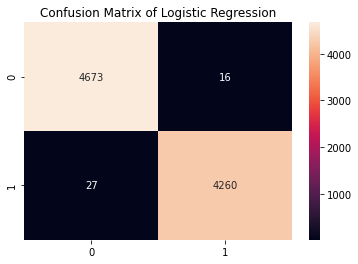

In [ ]:
pac_cfm = confusion_matrix(y_test, pred_pac)
plt.title('Confusion Matrix of Logistic Regression')
sns.heatmap(pac_cfm, annot=True, fmt="d")
# plt.savefig('plots/confusion_matrix.jpg')
plt.show()

### 2. Logistic Regression

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [ ]:
pred_lr = LR.predict(xv_test)

In [ ]:
lr_score = LR.score(xv_test, y_test)

In [ ]:
print(f'Accuracy: {round(lr_score*100, 2)}%')

Accuracy: 98.81%


In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4689
        real       0.99      0.99      0.99      4287

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



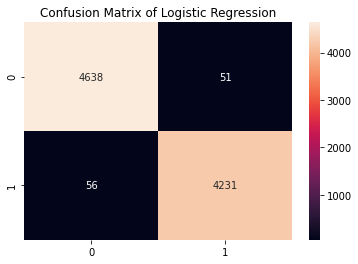

In [ ]:
lr_cfm = confusion_matrix(y_test, pred_lr)
plt.title('Confusion Matrix of Logistic Regression')
sns.heatmap(lr_cfm, annot=True, fmt="d")
# plt.savefig('plots/confusion_matrix.jpg')
plt.show()

### 3. Decision Tree Classification

In [ ]:
DTC = DecisionTreeClassifier()
DTC.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dtc = DTC.predict(xv_test)

In [ ]:
dtc_score = DTC.score(xv_test, y_test)

In [ ]:
print(f'Accuracy: {round(dtc_score*100, 2)}%')

Accuracy: 99.5%


In [ ]:
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

        fake       0.99      1.00      1.00      4689
        real       1.00      0.99      0.99      4287

    accuracy                           0.99      8976
   macro avg       1.00      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



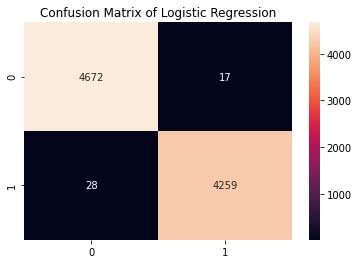

In [ ]:
dtc_cfm = confusion_matrix(y_test, pred_dtc)
plt.title('Confusion Matrix of Logistic Regression')
sns.heatmap(dtc_cfm, annot=True, fmt="d")
# plt.savefig('plots/confusion_matrix.jpg')
plt.show()

### 4. Gradient Boosting Classifier

In [ ]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gbc = GBC.predict(xv_test)

In [ ]:
gbc_score = GBC.score(xv_test, y_test)

In [ ]:
print(f'Accuracy: {round(gbc_score*100, 2)}%')

Accuracy: 99.63%


In [ ]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

        fake       1.00      0.99      1.00      4689
        real       0.99      1.00      1.00      4287

    accuracy                           1.00      8976
   macro avg       1.00      1.00      1.00      8976
weighted avg       1.00      1.00      1.00      8976



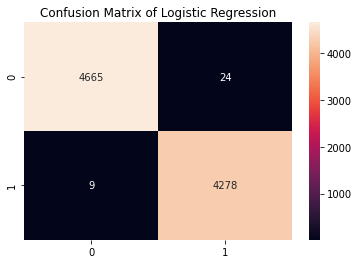

In [ ]:
gbc_cfm = confusion_matrix(y_test, pred_gbc)
plt.title('Confusion Matrix of Logistic Regression')
sns.heatmap(gbc_cfm, annot=True, fmt="d")
# plt.savefig('plots/confusion_matrix.jpg')
plt.show()

### 5. Random Forest Classifier

In [ ]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
rfc_score = RFC.score(xv_test, y_test)

In [ ]:
print(f'Accuracy: {round(rfc_score*100, 2)}%')

Accuracy: 98.89%


In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4689
        real       0.99      0.99      0.99      4287

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



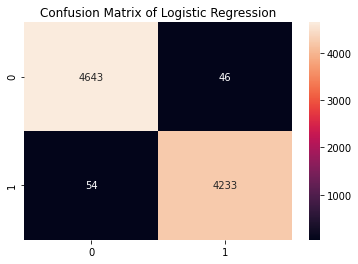

In [ ]:
rfc_cfm = confusion_matrix(y_test, pred_rfc)
plt.title('Confusion Matrix of Logistic Regression')
sns.heatmap(rfc_cfm, annot=True, fmt="d")
# plt.savefig('plots/confusion_matrix.jpg')
plt.show()

## Comparing Models

## Model Testing With Manual Entry

In [ ]:
def output_lable(n):
    if n == 'fake':
        return "Fake News"
    elif n == 'real':
        return "Real News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(drop_symbols) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_PAC = PAC.predict(new_xv_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DTC = DTC.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nPAC Prediction: {} \nLR Prediction: {} \nDTC Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_PAC[0]),

                            output_lable(pred_LR[0]),  
                                                                                                              output_lable(pred_DTC[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
news = str(input())
manual_testing(news)



PAC Prediction: Fake News 
LR Prediction: Fake News 
DTC Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News
